In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

In [4]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
class Net(nn.Module): 
    
    def __init__(self): 
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x): 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

net = Net()
print(net)    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS): 
    for data in trainset: 
        X, y = data 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss) 

tensor(0.0666, grad_fn=<NllLossBackward0>)
tensor(0.2873, grad_fn=<NllLossBackward0>)
tensor(0.0333, grad_fn=<NllLossBackward0>)


In [7]:
correct = 0
total = 0

with torch.no_grad(): 
    for data in trainset: 
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output): 
            if torch.argmax(i) == y[idx]: 
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


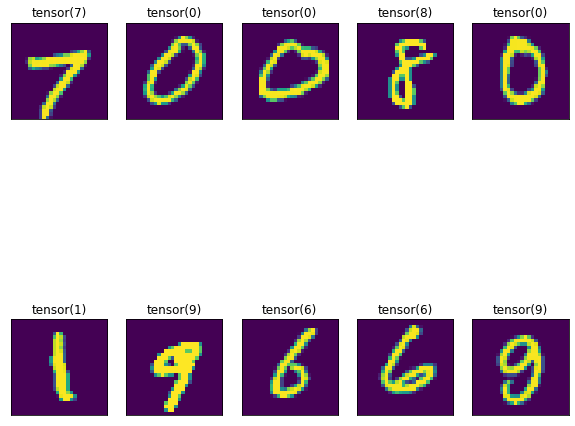

In [8]:
plt.figure(figsize = (10, 10))
for i in range(len(X)): 
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].view(28, 28))
    plt.title(torch.argmax(net(X[i].view(-1, 784))[0]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
for epoch in range(EPOCHS): 
    for data in testset: 
        X, y = data 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss) 

tensor(0.0433, grad_fn=<NllLossBackward0>)
tensor(0.2041, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)


In [10]:
correct = 0
total = 0

with torch.no_grad(): 
    for data in testset: 
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output): 
            if torch.argmax(i) == y[idx]: 
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.995


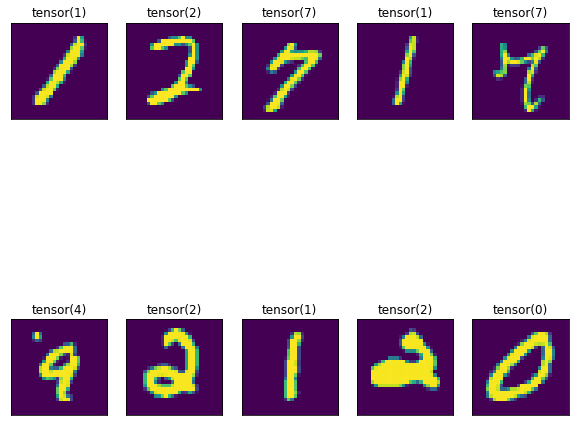

In [11]:
plt.figure(figsize = (10, 10))
for i in range(len(X)): 
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].view(28, 28))
    plt.title(torch.argmax(net(X[i].view(-1, 784))[0]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [12]:
import pandas as pd

train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [13]:
class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x): 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
net = Net()

def model(batchsize, learnrate, E): 
    trainset = torch.utils.data.DataLoader(train, batch_size = batchsize, shuffle = True)
    testset = torch.utils.data.DataLoader(test, batch_size = batchsize, shuffle = True)
    optimizer = optim.Adam(net.parameters(), lr = learnrate)
    for epoch in range(E): 
        for data in trainset: 
            X, y = data 
            net.zero_grad()
            output = net(X.view(-1, 28*28))
            loss = F.nll_loss(output, y)
            loss.backward()
            optimizer.step()

    correct = 0
    total = 0

    with torch.no_grad(): 
        for data in trainset: 
            X, y = data
            output = net(X.view(-1, 784))
            for idx, i in enumerate(output): 
                if torch.argmax(i) == y[idx]: 
                    correct += 1
                total += 1
    return round(correct/total, 3) 

In [14]:
batch_size = [5, 10, 20]
lr = [0.0001, 0.001, 0.01]
EPOCHS = [2, 3, 5]
y = {}

def evaluateModel():
    for i in batch_size: 
        for j in lr: 
            for k in EPOCHS: 
                print(i, j, k)
                y[(i, j, k)] = model(i, j, k)
    return y

In [15]:
#make sure it works
print(evaluateModel())

5 0.0001 2
5 0.0001 3
5 0.0001 5
5 0.001 2
5 0.001 3
5 0.001 5
5 0.01 2
5 0.01 3
5 0.01 5
10 0.0001 2
10 0.0001 3
10 0.0001 5
10 0.001 2
10 0.001 3
10 0.001 5
10 0.01 2
10 0.01 3
10 0.01 5
20 0.0001 2
20 0.0001 3
20 0.0001 5
20 0.001 2
20 0.001 3
20 0.001 5
20 0.01 2
20 0.01 3
20 0.01 5
{(5, 0.0001, 2): 0.935, (5, 0.0001, 3): 0.965, (5, 0.0001, 5): 0.98, (5, 0.001, 2): 0.973, (5, 0.001, 3): 0.979, (5, 0.001, 5): 0.988, (5, 0.01, 2): 0.92, (5, 0.01, 3): 0.937, (5, 0.01, 5): 0.802, (10, 0.0001, 2): 0.834, (10, 0.0001, 3): 0.843, (10, 0.0001, 5): 0.852, (10, 0.001, 2): 0.953, (10, 0.001, 3): 0.96, (10, 0.001, 5): 0.963, (10, 0.01, 2): 0.939, (10, 0.01, 3): 0.732, (10, 0.01, 5): 0.85, (20, 0.0001, 2): 0.864, (20, 0.0001, 3): 0.869, (20, 0.0001, 5): 0.872, (20, 0.001, 2): 0.957, (20, 0.001, 3): 0.962, (20, 0.001, 5): 0.966, (20, 0.01, 2): 0.869, (20, 0.01, 3): 0.952, (20, 0.01, 5): 0.958}


In [16]:
def main():
    levelValues = [batch_size, lr, EPOCHS]
    levelNames = ['batch_size', 'lr', 'EPOCHS']
    #apply evaluate model
    ind = pd.MultiIndex.from_product(levelValues, names=levelNames)
    data = pd.DataFrame(y.values(), index = ind, columns = ['accuracy'])

    i = 0 
    fig, ax = plt.subplots(1, 3, figsize = (21, 7))
    for key, subDf in data.groupby('batch_size'):
        subDf = subDf.droplevel('batch_size')
        for j in range(len(lr)): 
            val = subDf.accuracy.iloc[subDf.index.get_level_values('lr') == lr[j]]
            ax[i].plot(EPOCHS, val, marker = 'o', label = lr[j])
            ax[i].legend(loc='lower right', title = 'Learning Rate')
            ax[i].title.set_text('Batch Size ' + str(batch_size[i]))
        i += 1
        fig.text(x = 0.5, y = 0.04, s = 'EPOCHS', ha = 'center', va = 'center')
        fig.text(x = 0.09, y = 0.5, s = 'Accuracy', ha = 'center', va = 'center', rotation = 90)
    plt.suptitle('Model Evaluation for Different Batch Size, EPOCHS and Learning Rate') 
    plt.show()

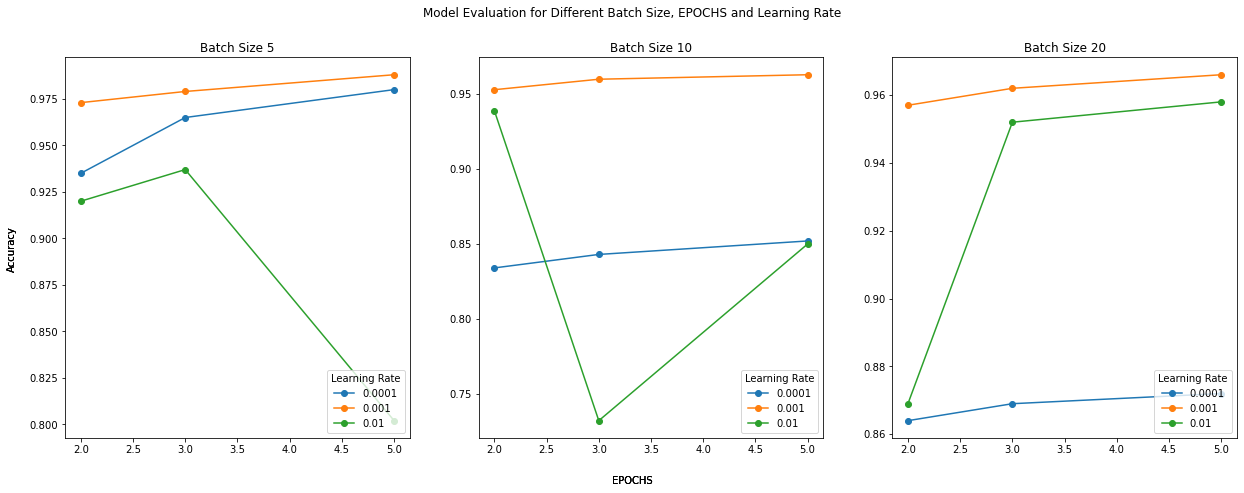

In [17]:
main()

In [18]:
levelValues = [batch_size, lr, EPOCHS]
levelNames = ['batch_size', 'lr', 'EPOCHS']
ind = pd.MultiIndex.from_product(levelValues, names=levelNames)
data = pd.DataFrame(y.values(), index = ind, columns = ['accuracy'])

In [19]:
data

accuracy
batch_size lr     EPOCHS          
5          0.0001 2          0.935
                  3          0.965
                  5          0.980
           0.0010 2          0.973
                  3          0.979
                  5          0.988
           0.0100 2          0.920
                  3          0.937
                  5          0.802
10         0.0001 2          0.834
                  3          0.843
                  5          0.852
           0.0010 2          0.953
                  3          0.960
                  5          0.963
           0.0100 2          0.939
                  3          0.732
                  5          0.850
20         0.0001 2          0.864
                  3          0.869
                  5          0.872
           0.0010 2          0.957
                  3          0.962
                  5          0.966
           0.0100 2          0.869
                  3          0.952
                  5          0.958